In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
dataset = pd.read_csv("data\SeoulBikeData.csv")

df = dataset.copy()

print(df.head(20))

          Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0   01/12/2017                254     0            -5.2           37   
1   01/12/2017                204     1            -5.5           38   
2   01/12/2017                173     2            -6.0           39   
3   01/12/2017                107     3            -6.2           40   
4   01/12/2017                 78     4            -6.0           36   
5   01/12/2017                100     5            -6.4           37   
6   01/12/2017                181     6            -6.6           35   
7   01/12/2017                460     7            -7.4           38   
8   01/12/2017                930     8            -7.6           37   
9   01/12/2017                490     9            -6.5           27   
10  01/12/2017                339    10            -3.5           24   
11  01/12/2017                360    11            -0.5           21   
12  01/12/2017                449    12             1.7         

# Data Cleaning

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [76]:
missing_values = df.isnull().sum()

print("Missing values count:", missing_values)

Missing values count: Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64


*Dataset does not have missing values, therefore no need to fill or delete entries.*

In [77]:
duplicates = df.duplicated().sum()

print("Duplicated values count:", duplicates)

Duplicated values count: 0


*Dataset does not have duplicated values => no need to drop duplicates.*

In [78]:
df.dtypes

Date                         object
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
dtype: object

*There is a need to convert some of the columns to different datatypes, but before that, they shall be explored: standartized, inconsistencies removed, etc.*

In [79]:
df['Functioning Day'].unique() # consistent

array(['Yes', 'No'], dtype=object)

In [80]:
df['Holiday'].unique() # consistent

array(['No Holiday', 'Holiday'], dtype=object)

In [81]:
df['Seasons'].unique() # consistent

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

*Those columns are consistent and standartized already, and they can later be encoded for easier analysis*

In [82]:
df['Date'] = pd.to_datetime(df['Date'], format = "%d/%m/%Y")

*In the numerical columns values can be checked for outliers and removed, some columns are not checked as they can be bound to the seasons* 

In [83]:
numerical_columns_to_check_for_outliers = ['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)', 
                                           'Visibility (10m)', 'Dew point temperature(C)']

In [84]:
for column in numerical_columns_to_check_for_outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    ouliers_count = df[(df[column] < lower) | (df[column] > upper)].count()[0]
    print(f"Outliers count for {column} column: {ouliers_count}")
    df = df[(df[column] >= lower) & (df[column] <= upper)] # remove outliers
    

Outliers count for Rented Bike Count column: 158
Outliers count for Hour column: 0
Outliers count for Temperature(C) column: 0
Outliers count for Humidity(%) column: 0
Outliers count for Visibility (10m) column: 0
Outliers count for Dew point temperature(C) column: 0


C:\Users\sasha\AppData\Local\Temp\ipykernel_32364\977183848.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ouliers_count = df[(df[column] < lower) | (df[column] > upper)].count()[0]
C:\Users\sasha\AppData\Local\Temp\ipykernel_32364\977183848.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ouliers_count = df[(df[column] < lower) | (df[column] > upper)].count()[0]
C:\Users\sasha\AppData\Local\Temp\ipykernel_32364\977183848.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

*158 outlining values were removed, which is not a big number compared to the size of the dataset and will not influence analysis.* 

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8602 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8602 non-null   datetime64[ns]
 1   Rented Bike Count         8602 non-null   int64         
 2   Hour                      8602 non-null   int64         
 3   Temperature(C)            8602 non-null   float64       
 4   Humidity(%)               8602 non-null   int64         
 5   Wind speed (m/s)          8602 non-null   float64       
 6   Visibility (10m)          8602 non-null   int64         
 7   Dew point temperature(C)  8602 non-null   float64       
 8   Solar Radiation (MJ/m2)   8602 non-null   float64       
 9   Rainfall(mm)              8602 non-null   float64       
 10  Snowfall (cm)             8602 non-null   float64       
 11  Seasons                   8602 non-null   object        
 12  Holiday                  

# Exploratory Data Analysis (EDA)

In [86]:
df.describe()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8602,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,2018-05-31 08:10:49.523366656,667.971635,11.377122,12.674890,58.372937,1.716124,1431.978958,3.916624,0.568715,0.151407,0.076447
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-02-28 00:00:00,188.000000,5.000000,3.200000,42.000000,0.900000,929.000000,-4.900000,0.000000,0.000000,0.000000
50%,2018-05-30 00:00:00,485.000000,11.000000,13.300000,57.000000,1.500000,1689.500000,4.800000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1030.750000,17.000000,22.200000,74.000000,2.300000,2000.000000,14.700000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,2375.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,589.552620,6.920938,11.937911,20.455133,1.038349,610.175009,13.102464,0.874273,1.138328,0.440620


<Axes: >

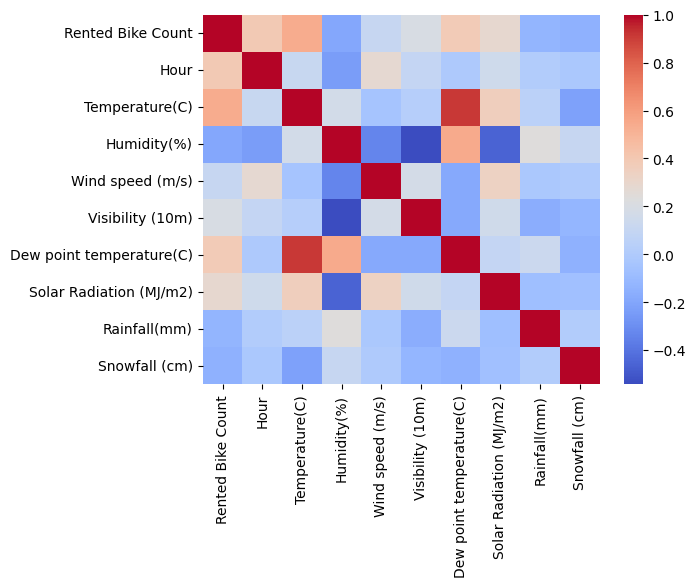

In [87]:
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap='coolwarm')

*Here we can see some positive correlations between Rented Bike Count and some columsn like: Hour, Temperature.*

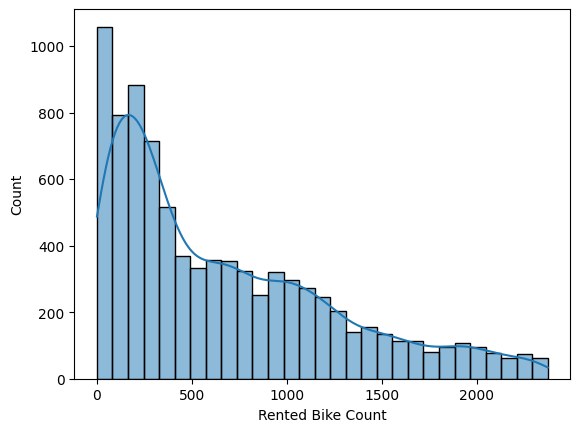

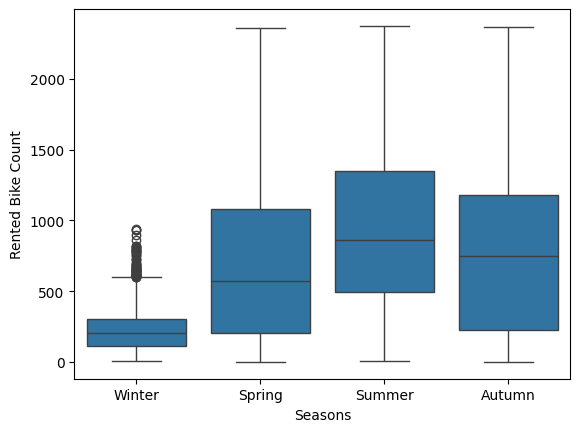

In [88]:
sns.histplot(df['Rented Bike Count'], kde=True) # Distribution of Rented Bike Count
plt.show()

sns.boxplot(x='Seasons', y='Rented Bike Count', data=df) # Boxplot for seasons vs bike rentals
plt.show()

*Here from the first histogram it can be observed, that majority of bike rentals for a day is around 0-500 bikes an hour. And from the second plot it is seen, that season 1 (winter) is not a super popular season for bike rentals, which is logical*

# Features

## Feature Engeneering

*Some features can be created to further assist model in predicting, like Weekday/Weekend feature, Day period, Renting demand...*

In [89]:
df['Weekday'] = df['Date'].dt.weekday # 0 = Monday, 6 = Sunday
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [90]:
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Day'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Hour'].apply(categorize_hour)

*Some columns can be normilized*

In [91]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df[['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)']] = scaler.fit_transform(
    df[['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)']])

*Now for columns 'Seasons', 'Holiday', 'Functioning Day', 'Time_of_Day' we can get dummies.*

In [92]:
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day', 'Time_of_Day'])

## Feature Importance

In [93]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Weekday',
       'Is_Weekend', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning Day_No', 'Functioning Day_Yes', 'Time_of_Day_Day',
       'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night'],
      dtype='object')

In [94]:
corr = df.corr()
corr['Rented Bike Count'].sort_values(ascending=False)

Rented Bike Count           1.000000
Temperature(C)              0.539483
Hour                        0.396070
Dew point temperature(C)    0.379862
Date                        0.355943
Seasons_Summer              0.287013
Solar Radiation (MJ/m2)     0.286884
Time_of_Day_Evening         0.266795
Functioning Day_Yes         0.213525
Visibility (10m)            0.193498
Time_of_Day_Day             0.170204
Seasons_Autumn              0.117443
Wind speed (m/s)            0.104367
Holiday_No Holiday          0.067252
Seasons_Spring              0.032096
Weekday                    -0.012333
Is_Weekend                 -0.015345
Time_of_Day_Morning        -0.056758
Holiday_Holiday            -0.067252
Rainfall(mm)               -0.127669
Snowfall (cm)              -0.145819
Humidity(%)                -0.196393
Functioning Day_No         -0.213525
Time_of_Day_Night          -0.373996
Seasons_Winter             -0.434574
Name: Rented Bike Count, dtype: float64

*The most correlated with Rented Bike Count are Temperature, Hour, Date, Seasons, and some weather-condition features.*
*Logically Seasons like Summer influence a positive correlation, while Winter influences a reversed correlation, same with time of the day...*

# Model

In [95]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [96]:
X = df.drop(['Rented Bike Count', 'Date'], axis=1)
y = df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
model = RandomForestRegressor(n_estimators=200, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [98]:
y_pred = model.predict(X_test)

In [99]:
mae = mean_absolute_error(y_pred, y_test)
print(f"Mean absolute error: {mae}")

mse = mean_squared_error(y_pred, y_test)
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse}")

r2 = r2_score(y_pred, y_test)
print(f"R² Score: {r2}")

Mean absolute error: 99.87184618364974
Root mean squared error: 163.04812700371866
R² Score: 0.9171132684542233


In [100]:
model.score(X_test, y_test)

0.925163842840841

*Attained score of 0.924 is a very good score for a model. Now hyperparameter tuning can be done, to attain even bigger accuracy of predicting values.*
*After hyperparameter tuning score increased to 0.925 (+0.001), which is not much*

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Score: 0.9136003009606112


## Model's Feature Importance

In [103]:
importance = model.feature_importances_
for i, col in enumerate(X.columns):
    print(f"{col}: {importance[i]}")

Hour: 0.2868465074320933
Temperature(C): 0.2956962297400571
Humidity(%): 0.08081204252808402
Wind speed (m/s): 0.012706954216172623
Visibility (10m): 0.014361629461031155
Dew point temperature(C): 0.02476695076155987
Solar Radiation (MJ/m2): 0.04755580509652464
Rainfall(mm): 0.04898515501195259
Snowfall (cm): 0.0008233547387615807
Weekday: 0.024831903225042327
Is_Weekend: 0.0144120413353826
Seasons_Autumn: 0.017334283637317493
Seasons_Spring: 0.004282406004970579
Seasons_Summer: 0.0029310114566835524
Seasons_Winter: 0.015552841858496516
Holiday_Holiday: 0.0027069792967753343
Holiday_No Holiday: 0.0030221039081346802
Functioning Day_No: 0.04478468702619434
Functioning Day_Yes: 0.052323013267000014
Time_of_Day_Day: 0.0022947484630073947
Time_of_Day_Evening: 0.0007922721102590571
Time_of_Day_Morning: 0.0017267888339179728
Time_of_Day_Night: 0.00045029059058123886


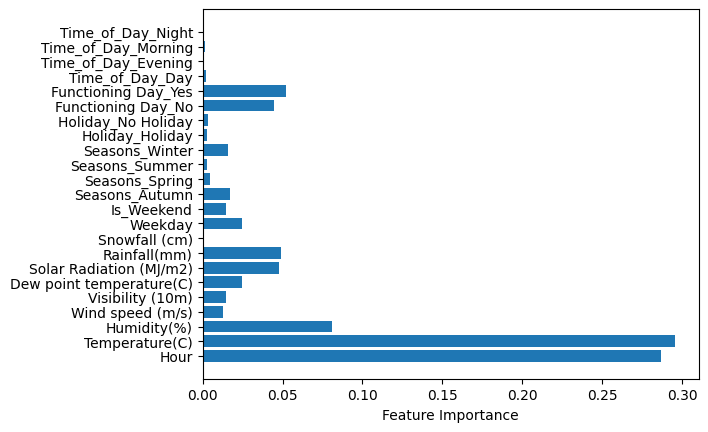

In [104]:
plt.barh(X.columns, importance)
plt.xlabel("Feature Importance")
plt.show()

**As was expected: time of the day as well as weather conditions along with season moment, are all most important features, with Hour and Temperature(C) being the most important ones.**